In [1]:
import pandas as pd
#Read in the tweets dataset
tweets = pd.read_excel("Data/stockerbot-export.xls")
print(tweets)

                        id                                               text  \
0      1019696670777500032  VIDEO: â€œI was in my office. I was minding my...   
1      1019709091038540032  The price of lumber $LB_F is down 22% since hi...   
2      1019711413798029952  Who says the American Dream is dead? https://t...   
3      1019716662587740032  Barry Silbert is extremely optimistic on bitco...   
4      1019718460287379968  How satellites avoid attacks and space junk wh...   
5      1019719465095789952  .@RealMoney's David Butler's favorite FANG sto...   
6      1019720209786109952  Donâ€™t miss my convo with one of my favorite ...   
7      1019720659738480000  U.S. intelligence documents on Nelson Mandela ...   
8      1019720723441629952  Senate wants emergency alerts to go out throug...   
9      1019721145396880000  Hedge fund manager Marc Larsy says bitcoin $40...   
10     1019723137481609984  U.S. proposes expedited appeal in fight with A...   
11     1019723744804240000  

In [2]:
#What are the most common tickers?
value_counts = tweets["symbols"].value_counts()
print(value_counts)

NFLX             101
MTB              100
MOMO             100
GPS              100
HON              100
ES               100
AMAT             100
GRPN              99
MHK               99
ESS               99
MAS               99
IR                98
FOX               98
HLT               97
TEL               97
BLK               97
UPS               97
D                 96
ON                96
NTNX              96
DFS               95
L                 95
ABBV              95
OMG               95
MCK               94
IP                94
TRIP              94
PBR               94
HSY               94
ARNC              93
                ... 
PM                28
LNC               26
WYN               26
BSX               25
FMSA              24
HOLX              24
TRV               24
CXO               24
AVB               24
SPN               23
BHGE              22
ALB               22
SIG               21
AYI               18
ABEV              17
HRB               16
CLF          

In [3]:
#There are combination tickers, but there are so few that it is not worth including in the analysis
i = value_counts.index.str.contains("-")
print(value_counts.loc[i])

FB-GOOGL-GOOG    1
INTC-USB         1
AMZN-GPS         1
Name: symbols, dtype: int64


In [4]:
#Let's take an example of the tweet text
print(tweets["text"].iloc[0])

VIDEO: â€œI was in my office. I was minding my own business...â€ â€“David Solomon tells $GS interns how he learned he waâ€¦ https://t.co/QClAITywXV


In [5]:
#What are Netflix's tweets
print(tweets[tweets["symbols"] == "NFLX"]['text'].iloc[0])

Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg


In [6]:
import re
#The $ can be used to reference different stocks
#Using regular expressions we can parse out connections
for x in tweets[tweets["symbols"] == "NFLX"]['text']:
    print(re.findall("\$[a-zA-Z]+", x))

[]
['$NFLX']
[]
['$FANG', '$FB', '$AMZN']
['$SPY', '$NFLX', '$UVXY', '$MS', '$CSX', '$ABT', '$UAL']
['$HMNY', '$AMD', '$MU']
['$NFLX']
['$CL']
['$FANG', '$FB', '$AMZN']
['$TWTR', '$FB', '$AAPL', '$NFLX', '$TSLA', '$AMZN', '$GOOGL']
['$TSLA']
['$NFLX', '$BAC', '$FB', '$MSFT', '$AAPL', '$MSFT', '$TWTR', '$BABA', '$TWTR', '$JD', '$NXPI', '$AMD', '$JPM', '$MU', '$TSLA', '$MS', '$C', '$ROKU', '$CSX']
['$FANG', '$FB', '$AMZN']
['$ABMD', '$CRM', '$PANW', '$TWTR', '$ALGN', '$NOW', '$FB', '$NFLX', '$ILMN', '$MA', '$V', '$LULU', '$ADBE', '$GOOGL', '$ISRG', '$A']
['$NFLX']
['$MS', '$BAC', '$CPAH']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
[]
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
['$TSLA', '$NFLX', '$BIDU', '$BABA', '$GOOGL', '$DIS']
['$SPY', '$NFLX', '$UVXY', '$MS', '$CSX', '$ABT', '$UAL']
['$NFLX']
['$AAPL', '$AMZN', '$NFLX', '$GOOGL', '$SPX', '$TWTR']
['$SPOT', '$NFLX', '$SIRI']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '

In [7]:
#It is not difficult to apply the regular expression to the dataframe
print(tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)))

8                                                       []
26391                                              [$NFLX]
26398                                                   []
26411                                  [$FANG, $FB, $AMZN]
26414          [$SPY, $NFLX, $UVXY, $MS, $CSX, $ABT, $UAL]
26416                                   [$HMNY, $AMD, $MU]
26420                                              [$NFLX]
26453                                                [$CL]
26505                                  [$FANG, $FB, $AMZN]
26507     [$TWTR, $FB, $AAPL, $NFLX, $TSLA, $AMZN, $GOOGL]
26531                                              [$TSLA]
26534    [$NFLX, $BAC, $FB, $MSFT, $AAPL, $MSFT, $TWTR,...
26554                                  [$FANG, $FB, $AMZN]
26585    [$ABMD, $CRM, $PANW, $TWTR, $ALGN, $NOW, $FB, ...
26612                                              [$NFLX]
26633                                   [$MS, $BAC, $CPAH]
26636               [$NFLX, $SIRI, $SPOT, $T, $AMZN, $DI

In [8]:
#And we can convert it to a boolean index signifying connections by mapping the arrays to series
print(tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(x))))

       $NFLX  $FANG  $FB  $AMZN  $UVXY  $UAL  $CSX  $SPY  $MS  $ABT  ...  \
8        NaN    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26391    1.0    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26398    NaN    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26411    NaN    1.0  1.0    1.0    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26414    1.0    NaN  NaN    NaN    1.0   1.0   1.0   1.0  1.0   1.0  ...   
26416    NaN    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26420    1.0    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26453    NaN    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26505    NaN    1.0  1.0    1.0    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26507    1.0    NaN  1.0    1.0    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26531    NaN    NaN  NaN    NaN    NaN   NaN   NaN   NaN  NaN   NaN  ...   
26534    1.0    NaN  1.0    NaN    NaN   NaN   1.0   NaN  1.0   NaN  ...   
26554    NaN

In [9]:
#Just don't forget to fill the null values with 0
test = tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(x))).fillna(0)
print(test)

       $NFLX  $FANG  $FB  $AMZN  $UVXY  $UAL  $CSX  $SPY  $MS  $ABT  ...  \
8        0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26391    1.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26398    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26411    0.0    1.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26414    1.0    0.0  0.0    0.0    1.0   1.0   1.0   1.0  1.0   1.0  ...   
26416    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26420    1.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26453    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26505    0.0    1.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26507    1.0    0.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26531    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...   
26534    1.0    0.0  1.0    0.0    0.0   0.0   1.0   0.0  1.0   0.0  ...   
26554    0.0

In [10]:
#Map takes a function and applies it over a list
list(map(str.lower, ["A", "a"]))

['a', 'a']

In [11]:
#So let's apply it so that we can normalize the tickers to all be uppercase
test = tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(map(str.upper, x)))).fillna(0)
print(test)

       $NFLX  $FANG  $FB  $AMZN  $UVXY  $UAL  $CSX  $SPY  $MS  $ABT  ...  $RH  \
8        0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26391    1.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26398    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26411    0.0    1.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26414    1.0    0.0  0.0    0.0    1.0   1.0   1.0   1.0  1.0   1.0  ...  0.0   
26416    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26420    1.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26453    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26505    0.0    1.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26507    1.0    0.0  1.0    1.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26531    0.0    0.0  0.0    0.0    0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
26534    1.0    0.0  1.0    

In [12]:
#What are the most commonly cross-referenced for Netflix?
test = test.sum()
print(test)

$NFLX     69.0
$FANG      9.0
$FB       25.0
$AMZN     33.0
$UVXY      3.0
$UAL       6.0
$CSX       6.0
$SPY       3.0
$MS        9.0
$ABT       3.0
$AMD       6.0
$HMNY      1.0
$MU        6.0
$CL        1.0
$TSLA     15.0
$TWTR     15.0
$GOOGL    14.0
$AAPL     18.0
$JD        5.0
$JPM       4.0
$C         3.0
$NXPI      4.0
$MSFT      5.0
$BAC       6.0
$ROKU      4.0
$BABA      8.0
$ILMN      1.0
$ALGN      1.0
$ADBE      1.0
$V         1.0
          ... 
$NVDA      3.0
$IBM       4.0
$GS        4.0
$EBAY      4.0
$SBUX      5.0
$GE        3.0
$PG        3.0
$F         3.0
$AAL       4.0
$GGP       2.0
$FOXA      2.0
$WMT       2.0
$CMCSA     2.0
$DAL       1.0
$IBB       2.0
$AABA      1.0
$WFC       1.0
$XLY       1.0
$XLK       1.0
$IQ        1.0
$RH        1.0
$IFN       1.0
$EROS      1.0
$EPI       1.0
$GOOG      1.0
$NWL       1.0
$ADDYY     2.0
$WIX       1.0
$SQ        2.0
$BA        1.0
Length: 77, dtype: float64


In [13]:
#Let's turn this into a function
def find_outward_connections(tweets):
    return tweets['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(map(str.upper, x)))).fillna(0).sum()
print(find_outward_connections(tweets[tweets["symbols"] == "NFLX"]))

$NFLX     69.0
$FANG      9.0
$FB       25.0
$AMZN     33.0
$UVXY      3.0
$UAL       6.0
$CSX       6.0
$SPY       3.0
$MS        9.0
$ABT       3.0
$AMD       6.0
$HMNY      1.0
$MU        6.0
$CL        1.0
$TSLA     15.0
$TWTR     15.0
$GOOGL    14.0
$AAPL     18.0
$JD        5.0
$JPM       4.0
$C         3.0
$NXPI      4.0
$MSFT      5.0
$BAC       6.0
$ROKU      4.0
$BABA      8.0
$ILMN      1.0
$ALGN      1.0
$ADBE      1.0
$V         1.0
          ... 
$NVDA      3.0
$IBM       4.0
$GS        4.0
$EBAY      4.0
$SBUX      5.0
$GE        3.0
$PG        3.0
$F         3.0
$AAL       4.0
$GGP       2.0
$FOXA      2.0
$WMT       2.0
$CMCSA     2.0
$DAL       1.0
$IBB       2.0
$AABA      1.0
$WFC       1.0
$XLY       1.0
$XLK       1.0
$IQ        1.0
$RH        1.0
$IFN       1.0
$EROS      1.0
$EPI       1.0
$GOOG      1.0
$NWL       1.0
$ADDYY     2.0
$WIX       1.0
$SQ        2.0
$BA        1.0
Length: 77, dtype: float64


In [14]:
#And now with the function let's apply for each source ticker
connections = tweets.groupby("symbols").apply(find_outward_connections)
print(connections)

symbols           
A        $A           73.0
         $ION          1.0
         $R            1.0
         $IT          11.0
         $I           12.0
         $AM           9.0
         $HUBS         1.0
         $CRY          3.0
         $EXAM         1.0
         $BAM          5.0
         $ONE          6.0
         $CUBE         2.0
         $OUT         13.0
         $AT          12.0
         $PEN          3.0
         $TOO          3.0
         $ACE          3.0
         $MS          11.0
         $FIG          1.0
         $BIG          3.0
         $HD           1.0
         $HA           1.0
         $STAY         2.0
         $MY           4.0
         $ATE          4.0
         $TEN          4.0
         $AGO          5.0
         $INN          3.0
         $KING         1.0
         $SEAS         5.0
                      ... 
ZTS      $IBM          1.0
         $VZ           1.0
         $VLO          1.0
         $JNJ          1.0
         $NOTIONAL     1.0
         

In [15]:
#Do some cleaning up
connections = connections.reset_index()
connections.columns = ["Source", "Target", "N"]
connections

,Source,Target,N
0,A,$A,73.0
1,A,$ION,1.0
2,A,$R,1.0
3,A,$IT,11.0
4,A,$I,12.0
5,A,$AM,9.0
6,A,$HUBS,1.0
7,A,$CRY,3.0
8,A,$EXAM,1.0
9,A,$BAM,5.0


In [16]:
#More fixing, get rid of the dollar signs
connections["Target"] = connections["Target"].str.replace("$","")
connections

,Source,Target,N
0,A,A,73.0
1,A,ION,1.0
2,A,R,1.0
3,A,IT,11.0
4,A,I,12.0
5,A,AM,9.0
6,A,HUBS,1.0
7,A,CRY,3.0
8,A,EXAM,1.0
9,A,BAM,5.0


In [17]:
#Pivot to get matrix form
connections = connections.pivot("Target", "Source", "N")
connections

Source,A,AABA,AAL,AAOI,AAP,AAPL,ABBV,ABC,ABEV,ABT,...,XOM,XRAY,XRX,XYL,YNDX,YUM,ZBH,ZNGA,ZTS,ticker
Target,,,,,,,,,,,,,,,,,,,,,
A,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AABA,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAC,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,6.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AALY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Fill the null values
connections = connections.fillna(0)

In [19]:
#An example of connections we might want to see: the FAANG stocks
#We will use reindex instead of loc in case one of the columns or indices is missing
FAANG =["FB","AAPL","AMZN","NFLX","GOOG"]
print(connections.reindex(index=FAANG, columns=FAANG).fillna(0))

Source    FB  AAPL  AMZN  NFLX  GOOG
Target                              
FB      50.0   0.0   0.0  25.0  10.0
AAPL     1.0  24.0   0.0  18.0  10.0
AMZN     1.0   0.0   0.0  33.0  14.0
NFLX     0.0   0.0   0.0  69.0   3.0
GOOG     0.0   0.0   0.0   1.0  70.0


In [20]:
#Which are the most referenced stocks?
print(connections.sum(axis=1).sort_values(ascending=False))

Target
NFLX     672.0
AMZN     533.0
SPY      454.0
FB       454.0
MSFT     414.0
AAPL     396.0
BAC      382.0
IBM      364.0
MS       331.0
CSX      330.0
BTC      328.0
QQQ      328.0
GS       311.0
JNJ      309.0
GOOGL    300.0
MU       289.0
AXP      271.0
TSLA     269.0
EBAY     259.0
SPX      257.0
GWW      242.0
GE       242.0
T        230.0
BABA     224.0
ABT      224.0
AMD      222.0
BA       218.0
JPM      213.0
TWTR     208.0
UAL      208.0
         ...  
MSMY       1.0
MSGN       1.0
MSEX       1.0
MSCN       1.0
NAN        1.0
NAP        1.0
NEU        1.0
NAT        1.0
CPER       1.0
NEPT       1.0
CPK        1.0
NEPH       1.0
NDC        1.0
NCT        1.0
NCMI       1.0
NCM        1.0
NCBDF      1.0
CPSI       1.0
CPSS       1.0
CPT        1.0
NBEV       1.0
NBDR       1.0
NBB        1.0
NAZ        1.0
CRDNC      1.0
CRE        1.0
NATI       1.0
CRES       1.0
CRESY      1.0
ZZC        1.0
Length: 5171, dtype: float64


In [21]:
#And which reference the most other tickers?
print(connections.sum().sort_values(ascending=False))

Source
SQQQ      1353.0
CTAS       920.0
ESS        890.0
HCP        872.0
ERIC       762.0
KSU        716.0
CCI        713.0
HON        683.0
TSM        650.0
AMAT       618.0
GNTX       610.0
ARNC       603.0
DXC        575.0
HLT        574.0
HSY        542.0
TAP        536.0
ABBV       528.0
ED         524.0
DLTR       523.0
MO         505.0
MHK        505.0
MTB        495.0
UPS        474.0
ISRG       461.0
MCHP       446.0
LOW        442.0
GRPN       438.0
COF        435.0
SCHW       418.0
YUM        412.0
           ...  
LNT         46.0
AON         46.0
IPG         45.0
CXO         44.0
GE          44.0
XYL         44.0
ADM         43.0
WRK         43.0
GIS         43.0
LMT         42.0
AIG         40.0
CTL         40.0
RTN         38.0
CLF         36.0
SPN         36.0
WYN         35.0
BSX         33.0
PM          31.0
ALB         30.0
ABEV        29.0
AVB         25.0
AAPL        25.0
HRB         21.0
NAVI        17.0
DOV         14.0
TSS         12.0
CMS         12.0
M      

In [22]:
#Recall the behavior of stack
print(connections.stack())

Target  Source
A       A         73.0
        AABA       0.0
        AAL        0.0
        AAOI       0.0
        AAP        0.0
        AAPL       0.0
        ABBV       0.0
        ABC        0.0
        ABEV       0.0
        ABT        0.0
        ABX        0.0
        ACN        0.0
        ADBE       0.0
        ADI        0.0
        ADM        0.0
        ADP        0.0
        ADS        0.0
        ADSK       0.0
        AEE        6.0
        AEP        0.0
        AES        0.0
        AET        0.0
        AGN        0.0
        AIG        0.0
        AIV        0.0
        AIZ        0.0
        AJG        0.0
        AKAM       0.0
        ALB        0.0
        ALGN       0.0
                  ... 
ZZC     WAT        0.0
        WBA        0.0
        WDC        0.0
        WEC        0.0
        WFC        0.0
        WFT        0.0
        WHR        0.0
        WLL        0.0
        WLTW       0.0
        WM         0.0
        WPX        0.0
        WRK        

In [23]:
#We can find unique connections in this way:
print((connections.stack() > 0).sum())

23047


In [24]:
#Let's find the cdf of size of each unique connection between tickers
#First stack and sort
unique_connections = connections.stack()
unique_connections = unique_connections[unique_connections > 0]
unique_connections = unique_connections.sort_values()
cdf = pd.Series(list(range(1,len(unique_connections)+1)), index=unique_connections)
print(cdf)

1.0         1
1.0         2
1.0         3
1.0         4
1.0         5
1.0         6
1.0         7
1.0         8
1.0         9
1.0        10
1.0        11
1.0        12
1.0        13
1.0        14
1.0        15
1.0        16
1.0        17
1.0        18
1.0        19
1.0        20
1.0        21
1.0        22
1.0        23
1.0        24
1.0        25
1.0        26
1.0        27
1.0        28
1.0        29
1.0        30
        ...  
79.0    23018
79.0    23019
79.0    23020
79.0    23021
79.0    23022
79.0    23023
80.0    23024
80.0    23025
80.0    23026
82.0    23027
82.0    23028
83.0    23029
83.0    23030
84.0    23031
85.0    23032
85.0    23033
85.0    23034
85.0    23035
86.0    23036
86.0    23037
87.0    23038
87.0    23039
88.0    23040
88.0    23041
89.0    23042
89.0    23043
90.0    23044
90.0    23045
94.0    23046
95.0    23047
Length: 23047, dtype: int64


In [25]:
#Dividing by the length of the unique connections will give the cdf
cdf = cdf / len(unique_connections)
cdf

1.0     0.000043
1.0     0.000087
1.0     0.000130
1.0     0.000174
1.0     0.000217
1.0     0.000260
1.0     0.000304
1.0     0.000347
1.0     0.000391
1.0     0.000434
1.0     0.000477
1.0     0.000521
1.0     0.000564
1.0     0.000607
1.0     0.000651
1.0     0.000694
1.0     0.000738
1.0     0.000781
1.0     0.000824
1.0     0.000868
1.0     0.000911
1.0     0.000955
1.0     0.000998
1.0     0.001041
1.0     0.001085
1.0     0.001128
1.0     0.001172
1.0     0.001215
1.0     0.001258
1.0     0.001302
          ...   
79.0    0.998742
79.0    0.998785
79.0    0.998828
79.0    0.998872
79.0    0.998915
79.0    0.998959
80.0    0.999002
80.0    0.999045
80.0    0.999089
82.0    0.999132
82.0    0.999176
83.0    0.999219
83.0    0.999262
84.0    0.999306
85.0    0.999349
85.0    0.999393
85.0    0.999436
85.0    0.999479
86.0    0.999523
86.0    0.999566
87.0    0.999609
87.0    0.999653
88.0    0.999696
88.0    0.999740
89.0    0.999783
89.0    0.999826
90.0    0.999870
90.0    0.9999

In [26]:
#Because there are repeats of the connection size we will take the maximum of the cdf value for each of the connection sizes
cdf = cdf.groupby(cdf.index).max()
print(cdf)

1.0     0.601076
2.0     0.771771
3.0     0.843971
4.0     0.882110
5.0     0.908578
6.0     0.926411
7.0     0.937736
8.0     0.945329
9.0     0.950189
10.0    0.955352
11.0    0.958780
12.0    0.962208
13.0    0.964464
14.0    0.966850
15.0    0.967978
16.0    0.969020
17.0    0.970322
18.0    0.971146
19.0    0.971623
20.0    0.972014
21.0    0.972795
22.0    0.973098
23.0    0.973446
24.0    0.974444
25.0    0.975398
26.0    0.975745
27.0    0.975919
28.0    0.976656
29.0    0.978869
30.0    0.979607
          ...   
62.0    0.993058
63.0    0.993318
64.0    0.994142
65.0    0.994359
66.0    0.994880
67.0    0.995271
68.0    0.995618
69.0    0.996138
70.0    0.996399
71.0    0.996789
72.0    0.996876
73.0    0.997093
74.0    0.997353
75.0    0.997614
76.0    0.997874
77.0    0.998395
78.0    0.998698
79.0    0.998959
80.0    0.999089
82.0    0.999176
83.0    0.999262
84.0    0.999306
85.0    0.999479
86.0    0.999566
87.0    0.999653
88.0    0.999740
89.0    0.999826
90.0    0.9999

In [27]:
import matplotlib.pyplot as plt
#And plot this
cdf.plot(kind='line')
plt.show()

<Figure size 640x480 with 1 Axes>

# Network

In [28]:
#First, let's get the top 5 firms that link to netflix to build a network graph
nflx_target = connections.loc["NFLX"]
nflx_target = nflx_target.sort_values(ascending=False)
print(nflx_target.head(6))

Source
NFLX    69.0
GNTX    48.0
CTAS    35.0
SIRI    26.0
HON     24.0
ISRG    19.0
Name: NFLX, dtype: float64


In [29]:
#Build the first level
first_level = nflx_target.head(6).reset_index()
first_level.columns = ["Source", "Connections"]
first_level["Target"] = "NFLX"
print(first_level)

  Source  Connections Target
0   NFLX         69.0   NFLX
1   GNTX         48.0   NFLX
2   CTAS         35.0   NFLX
3   SIRI         26.0   NFLX
4    HON         24.0   NFLX
5   ISRG         19.0   NFLX


In [30]:
#For the second we will iterate through each source but skip over netflix since we already did it
#We will also limit to 6 to keep it readable
second_level = []
for x in first_level["Source"]:
    if x == "NFLX":
        pass
    else:
        target = connections.loc[x]
        target = target.sort_values(ascending=False)
        target = target[target>0].head(6)
        target = target.reset_index()
        target.columns = ["Source", "Connections"]
        target["Target"] = x
        second_level.append(target)
second_level = pd.concat(second_level)
print(second_level)

  Source  Connections Target
0   GNTX         35.0   GNTX
1   TRIP          1.0   GNTX
0   CTAS         36.0   CTAS
1    KSU         29.0   CTAS
2    COF         10.0   CTAS
3     ED          7.0   CTAS
4   IDXX          5.0   CTAS
5    MKC          5.0   CTAS
0   SIRI         39.0   SIRI
1   FNSR          9.0   SIRI
2   AMAT          7.0   SIRI
3   NFLX          6.0   SIRI
4   VIAB          5.0   SIRI
5   SBUX          5.0   SIRI
0    HON         54.0    HON
1    KSU         28.0    HON
2    COF         10.0    HON
3   CTAS          8.0    HON
4    COL          8.0    HON
5    HUM          4.0    HON
0   ISRG         59.0   ISRG
1   CTAS         33.0   ISRG
2   IDXX         11.0   ISRG
3    HON         10.0   ISRG
4    MKC          5.0   ISRG
5    TJX          2.0   ISRG


In [31]:
#Let's also create a third level
#We will also do the same filtering of already analyzed targets
third_level = []
for x in second_level["Source"]:
    if x in first_level["Target"] or x in second_level["Target"]:
        pass
    else:
        target = connections.loc[x]
        target = target.sort_values(ascending=False)
        target = target[target>0].head(6)
        target = target.reset_index()
        target.columns = ["Source", "Connections"]
        target["Target"] = x
        third_level.append(target)
third_level = pd.concat(third_level)
print(third_level)

   Source  Connections Target
0    GNTX         35.0   GNTX
1    TRIP          1.0   GNTX
0    TRIP         79.0   TRIP
1      XL          7.0   TRIP
2     MHK          4.0   TRIP
0    CTAS         36.0   CTAS
1     KSU         29.0   CTAS
2     COF         10.0   CTAS
3      ED          7.0   CTAS
4    IDXX          5.0   CTAS
5     MKC          5.0   CTAS
0     KSU         43.0    KSU
1     JWN          2.0    KSU
2     STX          1.0    KSU
3    MCHP          1.0    KSU
0     COF         66.0    COF
1     KSU         29.0    COF
2    CTAS          8.0    COF
3    DLPH          4.0    COF
4     COL          2.0    COF
5      MA          2.0    COF
0      ED         87.0     ED
1    TRIP          2.0     ED
2     TSN          2.0     ED
3     PNR          1.0     ED
4      IP          1.0     ED
5     CBS          1.0     ED
0    IDXX         77.0   IDXX
1     MKC          4.0   IDXX
2    PTEN          1.0   IDXX
..    ...          ...    ...
1    CTAS         33.0   ISRG
2    IDXX 

In [32]:
! pip install networkx

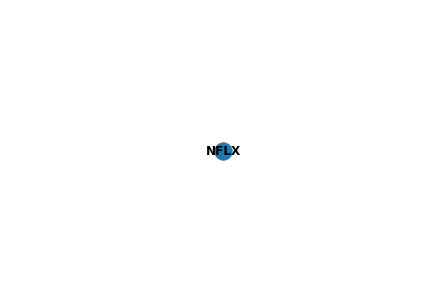

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
#Initialize the graph
G = nx.Graph()
#Add a node
G.add_node("NFLX")
#Draw and show the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

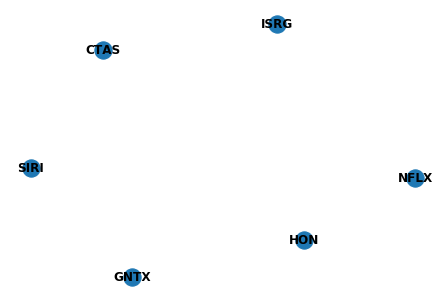

In [34]:
#Draw all nodes for the first and second level
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

C:\Users\E_CHINI\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


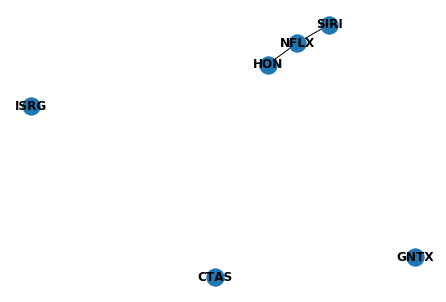

In [35]:
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
#An example of how to draw connections between nodes
G.add_edges_from([["NFLX", "HON"], ["NFLX", "SIRI"]])
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

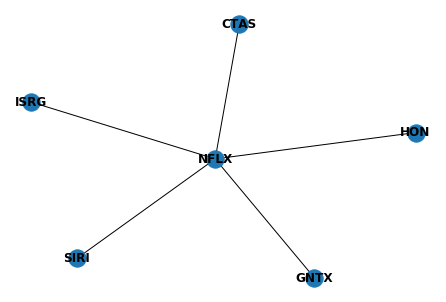

In [36]:
#Put it together for the first level connections
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
G.add_edges_from(first_level[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

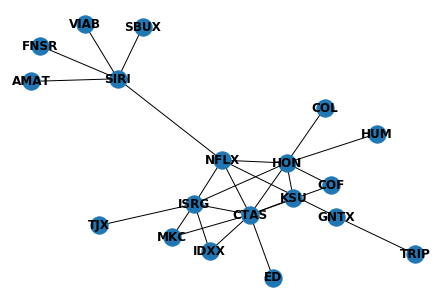

In [37]:
G = nx.Graph()
#Create a dataframe which holds first level and second level
graph_nodes = pd.concat([first_level, second_level])
for node in set(list(graph_nodes["Target"]) + list(graph_nodes["Source"])):
    G.add_node(node)
G.add_edges_from(graph_nodes[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

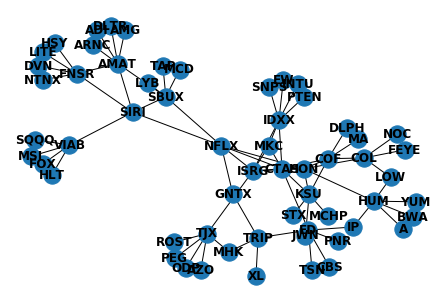

In [38]:
#Extend to the third level
G = nx.Graph()
graph_nodes = pd.concat([first_level, second_level, third_level])
for node in set(list(graph_nodes["Target"]) + list(graph_nodes["Source"])):
    G.add_node(node)
G.add_edges_from(graph_nodes[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Page Rank

In [39]:
#Let's begin with four nodes, we can think of these as web pages
#A has links to B, C, D.... B links to A, D and so on
out_bound_connections = {"A": ["B", "C", "D"],
                        "B": ["A", "D"],
                        "C":["A"],
                        "D": ["C", "B"]}

In [40]:
#The page rank starts equally for each page
page_rank = {"A": .25, "B": .25, "C": .25, "D": .25}

In [41]:
#Using the page rank we can iterate through each page and see how they transfer their page rank to others
#Let's see how one iteration of page rank would work
new_page_rank = {"A": 0, "B": 0, "C": 0, "D": 0}
for node in out_bound_connections.keys():
    print("Node: {}".format(node))
    print("Page Rank:")
    print(page_rank[node])
    print("Out Connections:")
    print(out_bound_connections[node])
    for connected_node in out_bound_connections[node]:
        new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node]
    print("New page ranks at most recent step:")
    print(new_page_rank)
    print()
print("Final page rank:")
print(new_page_rank)

Node: A
Page Rank:
0.25
Out Connections:
['B', 'C', 'D']
New page ranks at most recent step:
{'A': 0, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.08333333333333333}

Node: B
Page Rank:
0.25
Out Connections:
['A', 'D']
New page ranks at most recent step:
{'A': 0.125, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.20833333333333331}

Node: C
Page Rank:
0.25
Out Connections:
['A']
New page ranks at most recent step:
{'A': 0.375, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.20833333333333331}

Node: D
Page Rank:
0.25
Out Connections:
['C', 'B']
New page ranks at most recent step:
{'A': 0.375, 'B': 0.20833333333333331, 'C': 0.20833333333333331, 'D': 0.20833333333333331}

Final page rank:
{'A': 0.375, 'B': 0.20833333333333331, 'C': 0.20833333333333331, 'D': 0.20833333333333331}


In [42]:
#Adding a damping factor can be done in the following way
page_rank = {"A": .25, "B": .25, "C": .25, "D": .25}
damping_factor = .85
new_page_rank = {}
for node_name in ["A", "B", "C", "D"]:
    new_page_rank[node_name] = (1-damping_factor) /4
print("Starting page ranks before adding:")
print(new_page_rank)
print()
for node in out_bound_connections.keys():
    print("Node: {}".format(node))
    print("Page Rank:")
    print(page_rank[node])
    print("Out Connections:")
    print(out_bound_connections[node])
    for connected_node in out_bound_connections[node]:
        new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node] * damping_factor
    print("Updated page ranks at most recent step:")
    print(new_page_rank)
    print()
print("Final page rank:")
print(new_page_rank)

Starting page ranks before adding:
{'A': 0.037500000000000006, 'B': 0.037500000000000006, 'C': 0.037500000000000006, 'D': 0.037500000000000006}

Node: A
Page Rank:
0.25
Out Connections:
['B', 'C', 'D']
Updated page ranks at most recent step:
{'A': 0.037500000000000006, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.10833333333333334}

Node: B
Page Rank:
0.25
Out Connections:
['A', 'D']
Updated page ranks at most recent step:
{'A': 0.14375, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.21458333333333335}

Node: C
Page Rank:
0.25
Out Connections:
['A']
Updated page ranks at most recent step:
{'A': 0.35624999999999996, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.21458333333333335}

Node: D
Page Rank:
0.25
Out Connections:
['C', 'B']
Updated page ranks at most recent step:
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}

Final page rank:
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C':

In [43]:
#And how we can formalize into a function
def compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor):
    new_page_rank = {}
    for node_name in ["A", "B", "C", "D"]:
        new_page_rank[node_name] = (1-damping_factor) / len(node_names)
    for node in out_bound_connections.keys():
        for connected_node in out_bound_connections[node]:
            new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node] * damping_factor
    return new_page_rank

node_names = ["A", "B", "C", "D"]
page_rank = {}
for node_name in node_names:
        page_rank[node_name] = (1) / len(node_names)
print(page_rank)
print(compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor))

{'A': 0.25, 'B': 0.25, 'C': 0.25, 'D': 0.25}
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}


In [44]:
#Watch what happens when we keep iterating
node_names = ["A", "B", "C", "D"]
damping_factor = .85
page_rank = {}
for node_name in node_names:
        page_rank[node_name] = 1 / len(node_names)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)

{'A': 0.25, 'B': 0.25, 'C': 0.25, 'D': 0.25}
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}
{'A': 0.31109375000000006, 'B': 0.22963541666666665, 'C': 0.22963541666666665, 'D': 0.22963541666666665}
{'A': 0.33028515625, 'B': 0.22323828125, 'C': 0.22323828125, 'D': 0.22323828125}
{'A': 0.32212880859375004, 'B': 0.22595706380208333, 'C': 0.22595706380208333, 'D': 0.22595706380208333}


In [45]:
import pandas as pd

#Now let's move beyond dictionaries into matrix form
#First denote each column as what a ticker points to
#So column A has 1 for B, C, D since it points out to them
connection_matrix = pd.DataFrame([[0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 0, 1],
 [1, 1, 0, 0]],
                               index = ["A", "B", "C", "D"],
                               columns = ["A", "B", "C", "D"])
print(connection_matrix)
print()
#Normalize by total number of connections out for each column
connection_matrix = connection_matrix / connection_matrix.sum()
print(connection_matrix)

   A  B  C  D
A  0  1  1  0
B  1  0  0  1
C  1  0  0  1
D  1  1  0  0

          A    B    C    D
A  0.000000  0.5  1.0  0.0
B  0.333333  0.0  0.0  0.5
C  0.333333  0.0  0.0  0.5
D  0.333333  0.5  0.0  0.0


In [46]:
#Now, there is a vector for page rank
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
print(page_rank_vector)

A    0.25
B    0.25
C    0.25
D    0.25
dtype: float64


In [47]:
#A row times the page rank vector would denote what the new page rank would be
#In this case without a damping factor
print(connection_matrix.loc["A"] * page_rank_vector)
print()
print((connection_matrix.loc["A"] * page_rank_vector).sum())

A    0.000
B    0.125
C    0.250
D    0.000
dtype: float64

0.375


In [48]:
#And with matrix multiplication we can simply calculate all the new page ranks
print(connection_matrix.dot(page_rank_vector))

A    0.375000
B    0.208333
C    0.208333
D    0.208333
dtype: float64


           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.375000  0.208333  0.208333  0.208333
2   0.312500  0.229167  0.229167  0.229167
3   0.343750  0.218750  0.218750  0.218750
4   0.328125  0.223958  0.223958  0.223958
5   0.335938  0.221354  0.221354  0.221354
6   0.332031  0.222656  0.222656  0.222656
7   0.333984  0.222005  0.222005  0.222005
8   0.333008  0.222331  0.222331  0.222331
9   0.333496  0.222168  0.222168  0.222168
10  0.333252  0.222249  0.222249  0.222249
11  0.333374  0.222209  0.222209  0.222209
12  0.333313  0.222229  0.222229  0.222229
13  0.333344  0.222219  0.222219  0.222219
14  0.333328  0.222224  0.222224  0.222224
15  0.333336  0.222221  0.222221  0.222221
16  0.333332  0.222223  0.222223  0.222223
17  0.333334  0.222222  0.222222  0.222222
18  0.333333  0.222222  0.222222  0.222222
19  0.333333  0.222222  0.222222  0.222222
20  0.333333  0.222222  0.222222  0.222222


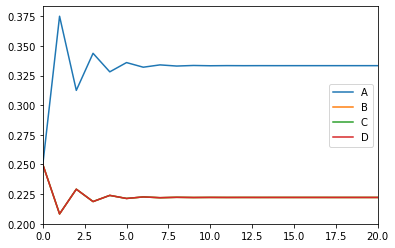

In [49]:
import matplotlib.pyplot as plt

#Let's see how the page ranks would eventually converge if not using a damping factor
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

In [50]:
#Alternatively, with a damping factor, we can calculate as so
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
damping_factor = .85

page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
print(page_rank_vector)

A    0.356250
B    0.214583
C    0.214583
D    0.214583
dtype: float64


           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.356250  0.214583  0.214583  0.214583
2   0.311094  0.229635  0.229635  0.229635
3   0.330285  0.223238  0.223238  0.223238
4   0.322129  0.225957  0.225957  0.225957
5   0.325595  0.224802  0.224802  0.224802
6   0.324122  0.225293  0.225293  0.225293
7   0.324748  0.225084  0.225084  0.225084
8   0.324482  0.225173  0.225173  0.225173
9   0.324595  0.225135  0.225135  0.225135
10  0.324547  0.225151  0.225151  0.225151
11  0.324567  0.225144  0.225144  0.225144
12  0.324559  0.225147  0.225147  0.225147
13  0.324563  0.225146  0.225146  0.225146
14  0.324561  0.225146  0.225146  0.225146
15  0.324562  0.225146  0.225146  0.225146
16  0.324561  0.225146  0.225146  0.225146
17  0.324561  0.225146  0.225146  0.225146
18  0.324561  0.225146  0.225146  0.225146
19  0.324561  0.225146  0.225146  0.225146
20  0.324561  0.225146  0.225146  0.225146


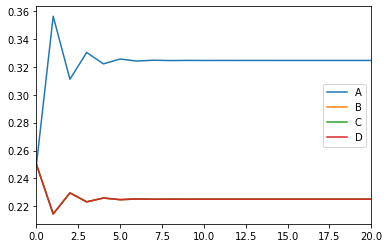

In [51]:
#And the same analysis
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.462500  0.214583  0.108333  0.214583
2   0.311979  0.259740  0.168542  0.259740
3   0.401539  0.236283  0.125894  0.236283
4   0.345351  0.251690  0.151269  0.251690
5   0.380015  0.242318  0.135349  0.242318
6   0.358517  0.248156  0.145171  0.248156
7   0.371828  0.244546  0.139080  0.244546
8   0.363582  0.246783  0.142851  0.246783
9   0.368689  0.245398  0.140515  0.245398
10  0.365526  0.246256  0.141962  0.246256
11  0.367485  0.245724  0.141066  0.245724
12  0.366272  0.246054  0.141621  0.246054
13  0.367023  0.245850  0.141277  0.245850
14  0.366558  0.245976  0.141490  0.245976
15  0.366846  0.245898  0.141358  0.245898
16  0.366668  0.245946  0.141440  0.245946
17  0.366778  0.245916  0.141389  0.245916
18  0.366710  0.245935  0.141420  0.245935
19  0.366752  0.245923  0.141401  0.245923
20  0.366726  0.245931  0.141413  0.245931


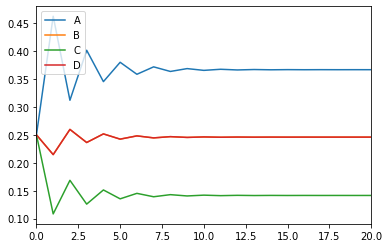

In [52]:
#Now what if D instead pointed only to A and B instead?
connection_matrix["D"] = [.5,.5,0,0]
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

In [53]:
import numpy as np
#Finally, we might want to not run x runs but instead run until the differences are extremely small
#Especially when we work with a larger dataset
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])

page_rank_vector_new = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)

#We can compute distance to see what the amount of change was
print(np.linalg.norm(page_rank_vector - page_rank_vector_new, 2))

0.2602582851707127


In [54]:
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
#You can see the differences get smaller and smaller
for _ in range(20):
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    print(np.linalg.norm(page_rank_vector - page_rank_vector_old, 2))

0.2602582851707127
0.17424046171387372
0.1045952833774308
0.06538909118334943
0.04038254437344823
0.02503634605186005
0.015503167955968756
0.009603639078095237
0.005948386377146021
0.00368450241355703
0.002282198385197637
0.0014136098126659535
0.0008755988926000681
0.0005423517109635968
0.0003359361771434856
0.00020808106048124514
0.00012888676536890442
7.983330298146346e-05
4.9449268430374195e-05
3.062919931696637e-05


In [55]:
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
#Start with a dummy old value
page_rank_vector_old = pd.Series(100, index = ["A", "B", "C", "D"])
i = 0
while np.linalg.norm(page_rank_vector - page_rank_vector_old, 2) > 1.0e-6:
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    i+=1
print(page_rank_vector)
print("Took {} loops to converge".format(i))

A    0.366736
B    0.245928
C    0.141409
D    0.245928
dtype: float64
Took 28 loops to converge


In [56]:
#Let's re-visit the twitter dataset, recall our matrix...
print(connections)

Source     A  AABA   AAL  AAOI   AAP  AAPL  ABBV   ABC  ABEV  ABT  ...  XOM  \
Target                                                             ...        
A       73.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AA       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AABA     0.0  56.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAC      0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  0.0  ...  0.0   
AAGC     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAL      0.0   6.0  58.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AALY     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAME     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAN      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAOI     0.0   0.0   0.0  77.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
AAP      0.0   0.0   0.0   0.0  69.0   0.0   0.0   0

In [57]:
#Let's turn it into a binary matrix
connections_binary = connections.copy()
connections_binary[connections_binary > 0] = 1

#Reindex so that all index and column values are present
i = connections_binary.index.union(connections_binary.columns)
connections_binary = connections_binary.reindex(index=i, columns=i).fillna(0)

In [58]:
#We want to also eliminate diagonal elements

#First grab the indices present in the matrix
rows, cols = np.indices((len(connections_binary.columns), len(connections_binary.columns)))

#Diagonal elements indices
print(rows == cols)

mask = rows == cols
connections_binary = connections_binary.mask(mask).fillna(0)
print(connections_binary)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False  True]]
          A   AA  AABA  AAC  AAGC  AAL  AALY  AAME  AAN  AAOI  ...  ZSC  \
A       0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AA      0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AABA    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAC     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAGC    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAL     0.0  0.0   1.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AALY    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAME    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAN     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0

In [59]:
#Finally, normalize the columns to sum to 1
connections_binary = (connections_binary / connections_binary.sum()).fillna(0)
print(connections_binary)

          A   AA      AABA  AAC  AAGC  AAL  AALY  AAME  AAN      AAOI  ...  \
A       0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AA      0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AABA    0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAC     0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAGC    0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAL     0.0  0.0  0.010309  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AALY    0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAME    0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAN     0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAOI    0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAP     0.0  0.0  0.000000  0.0   0.0  0.0   0.0   0.0  0.0  0.000000  ...   
AAPL    0.0  0.0  0.010309  0.0   0.0  0.0   0.0   0.0  0.0  0.0

In [60]:
page_rank_vector = pd.Series(1/len(connections_binary), index = connections_binary.index)
#Start with a dummy old value
page_rank_vector_old = pd.Series(100, index = connections_binary.index)
damping_factor = .85

i = 0
while np.linalg.norm(page_rank_vector - page_rank_vector_old, 2) > 1.0e-6:
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connections_binary) + damping_factor * connections_binary.dot(page_rank_vector)
    i+=1
print(page_rank_vector.sort_values(ascending=False))
print("Took {} loops to converge".format(i))

AMZN      0.000251
IBM       0.000211
LINK      0.000204
MSFT      0.000203
NFLX      0.000152
AAPL      0.000144
FB        0.000112
NVDA      0.000109
TSLA      0.000109
TWTR      0.000105
GOOGL     0.000104
BAC       0.000102
SPY       0.000097
MU        0.000090
GS        0.000087
SPX       0.000085
MS        0.000083
T         0.000078
F         0.000075
IQ        0.000074
LB        0.000073
JPM       0.000073
AMD       0.000072
BTC       0.000071
BABA      0.000071
WFC       0.000070
GE        0.000070
CSX       0.000069
C         0.000068
JNJ       0.000067
            ...   
QQEW      0.000029
SXCP      0.000029
VLUE      0.000029
PNTR      0.000029
NUAN      0.000029
DGRW      0.000029
UDR       0.000029
DCM       0.000029
UBMOF     0.000029
OCFC      0.000029
TYHT      0.000029
PARR      0.000029
HIBB      0.000029
IWD       0.000029
PYZ       0.000029
ESS       0.000029
IP        0.000029
MUR       0.000029
SNPS      0.000029
DCIX      0.000029
SLM       0.000029
ARRY      0.